## 1η εργασία: Προετοιμασία δεδομένων & στατιστική ανάλυση

In [ ]:
# Εισαγωγή των απαραίτητων Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Εγκατάσταση του ucimlrepo για ανάκτηση του dataset
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Λήψη του dataset
adult = fetch_ucirepo(id=2)

# Ανάθεση των χαρακτηριστικών και της στήλης στόχου σε μεταβλητές
X = adult.data.features
y = adult.data.targets

# Συνένωση των χαρακτηριστικών και της στήλης στόχου σε ένα DataFrame
data = pd.concat([X, y], axis=1)

# Αποθήκευση των δεδομένων σε CSV αρχείο
data.to_csv("adult.csv", index=False)

### α) Καθαρισμός Δεδομένων

In [ ]:
adult = pd.read_csv("adult.csv") # φόρτωση του CSV αρχείου με τα δεδομένα

In [ ]:
adult.head() # προβολή των 5 πρώτων γραμμών του dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult.shape # προβολή διαστάσεων του dataset

(48842, 15)

In [ ]:
adult.info() # προβολή πληροφοριών σχετικά με το dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Έλεγχος για ελλιπείς τιμές
print("Πλήθος ελλιπών τιμών για κάθε στήλη του dataset:")
print(adult.isnull().sum())

Πλήθος ελλιπών τιμών για κάθε στήλη του dataset:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


Υπάρχουν ελλιπείς τιμές στις στήλες workclass, occupation και native-country.
Προχωράμε στη διαχείρισή τους.

1. Στήλη **workclass**

In [ ]:
adult["workclass"].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
?,1836
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
# Αντικατάσταση τόσο των ελλιπών τιμών όσο και της κατηγορίας '?' με την κατηγορία 'Unknown'
adult["workclass"] = adult["workclass"].replace("?", "Unknown")
adult["workclass"].fillna("Unknown", inplace=True)

In [ ]:
adult["workclass"].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
Unknown,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


2. Στήλη **occupation**

In [ ]:
adult["occupation"].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [ ]:
# Αντικατάσταση τόσο των ελλιπών τιμών όσο και της κατηγορίας '?' με την κατηγορία 'Unknown'
adult["occupation"] = adult["occupation"].replace("?", "Unknown")
adult["occupation"].fillna("Unknown", inplace=True)

In [ ]:
adult["occupation"].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Unknown,2809
Transport-moving,2355


3. Στήλη **native-country**

In [ ]:
adult["native-country"].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,583
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [ ]:
# Αντικατάσταση τόσο των ελλιπών τιμών όσο και της κατηγορίας '?' με την κατηγορία 'Unknown'
adult["native-country"] = adult["native-country"].replace("?", "Unknown")
adult["native-country"].fillna("Unknown", inplace=True)

In [ ]:
adult["native-country"].value_counts()

,count
native-country,
United-States,43832
Mexico,951
Unknown,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


4. Στήλη **income**

In [ ]:
adult["income"].value_counts()

,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


Υπάρχει ασυνέπεια στις τιμές, καθώς εμφανίζονται 4 τιμές αντί για 2. Προχωράμε σε διόρθωση αυτής της ασυνέπειας

In [ ]:
# Διόρθωση της ασυνέπειας στη στήλη income
adult["income"] = adult["income"].replace({"<=50K.": "<=50K", ">50K.": ">50K"})

In [ ]:
adult["income"].value_counts()

,count
income,
<=50K,37155
>50K,11687


In [ ]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Παρατηρούμε ότι δεν υπάρχει κάποια μη λογική τιμή, π.χ. αρνητικός αριθμός, στα αριθμητικά χαρακτηριστικά

In [ ]:
adult[adult["workclass"] == "Never-worked"] # προβολή των εγγραφών που περιλαμβάνουν άτομα που δεν έχουν δουλέψει ποτέ

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,Unknown,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,Unknown,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,Unknown,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,Unknown,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,Unknown,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,Unknown,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,Unknown,Own-child,White,Male,0,0,4,United-States,<=50K
41346,17,Never-worked,131593,11th,7,Never-married,Unknown,Own-child,Black,Female,0,0,20,United-States,<=50K
44168,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,Unknown,Other-relative,White,Male,0,0,35,United-States,<=50K
46459,18,Never-worked,162908,11th,7,Never-married,Unknown,Own-child,White,Male,0,0,35,United-States,<=50K


Παρατηρούμε πως όσοι έχουν workclass: "Never-worked", η αντίστοιχη τιμή του occupation είναι "Unknown", οπότε διορθώνουμε αυτή την ασυνέπεια

In [ ]:
adult.loc[adult["workclass"] == "Never-worked", "occupation"] = "No-occupation" # συμπλήρωση του occupation με "No-occupation"

In [ ]:
adult[adult["workclass"] == "Never-worked"] # προβολή ξανά των εγγραφών για επιβεβαίωση των αλλαγών

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5361,18,Never-worked,206359,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,No-occupation,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,No-occupation,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,No-occupation,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,No-occupation,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,No-occupation,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,No-occupation,Own-child,White,Male,0,0,4,United-States,<=50K
41346,17,Never-worked,131593,11th,7,Never-married,No-occupation,Own-child,Black,Female,0,0,20,United-States,<=50K
44168,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,No-occupation,Other-relative,White,Male,0,0,35,United-States,<=50K
46459,18,Never-worked,162908,11th,7,Never-married,No-occupation,Own-child,White,Male,0,0,35,United-States,<=50K


### β) Μετασχηματισμός Δεδομένων

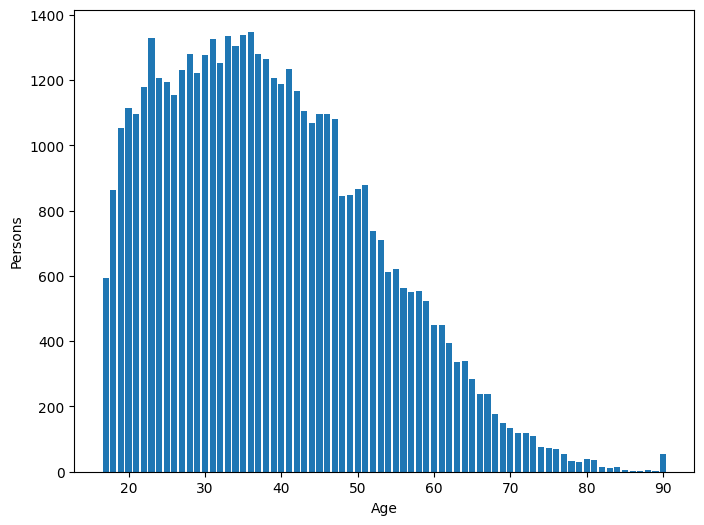

In [ ]:
age_counts = adult["age"].value_counts() # κατανομή των ηλικιών του dataset

# Γραφική απεικόνιση της κατανομής των ηλικιών
plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel("Age")
plt.ylabel("Persons")
plt.show()

In [ ]:
# Διακριτοποίηση του χαρακτηριστικού age σε τρεις κατηγορίες ως εξής:
# Young: 17-34, Middle-aged: 35-64, Senior: 65-99

adult["age"] = pd.cut(adult["age"], bins=[16, 34, 64, 99], labels=["Young", "Middle-aged", "Senior"]).astype(str)

In [ ]:
adult["age"].value_counts() # προβολή της νέας κατανομής

,count
age,
Middle-aged,25746
Young,21009
Senior,2087


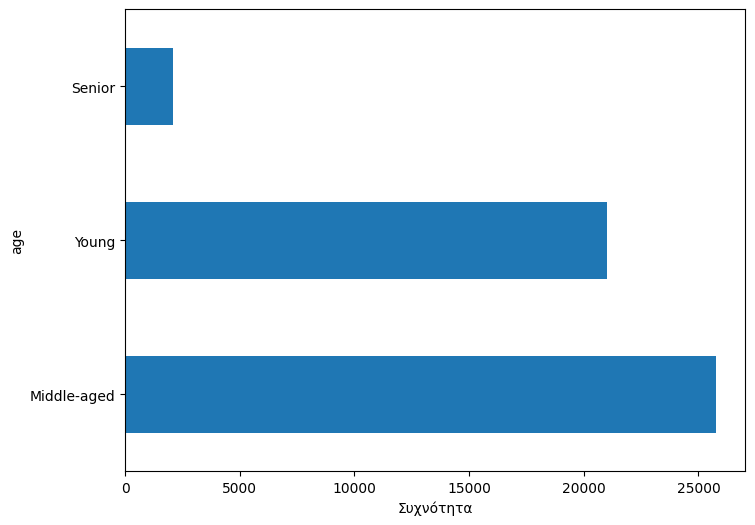

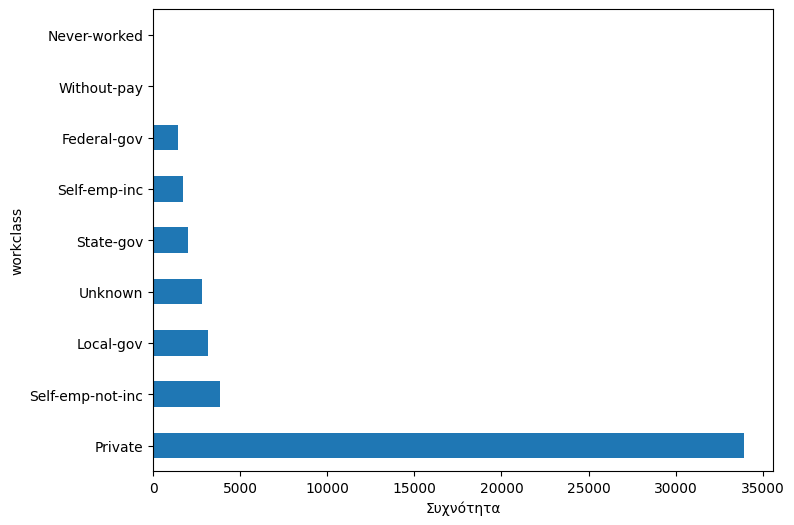

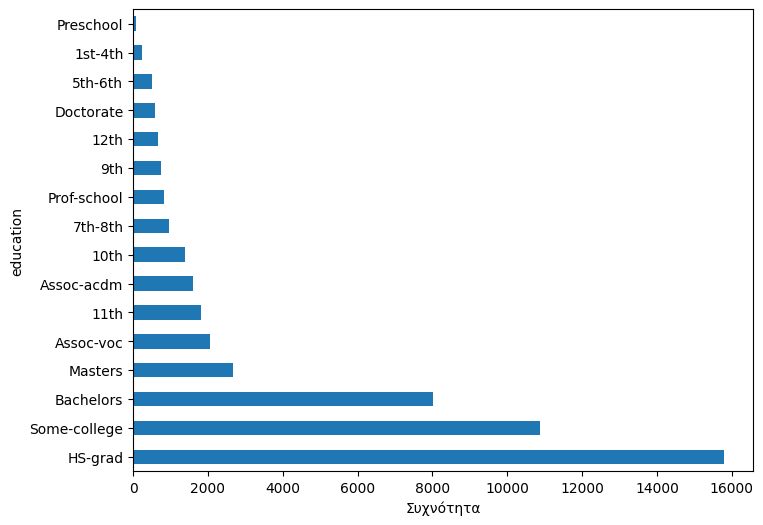

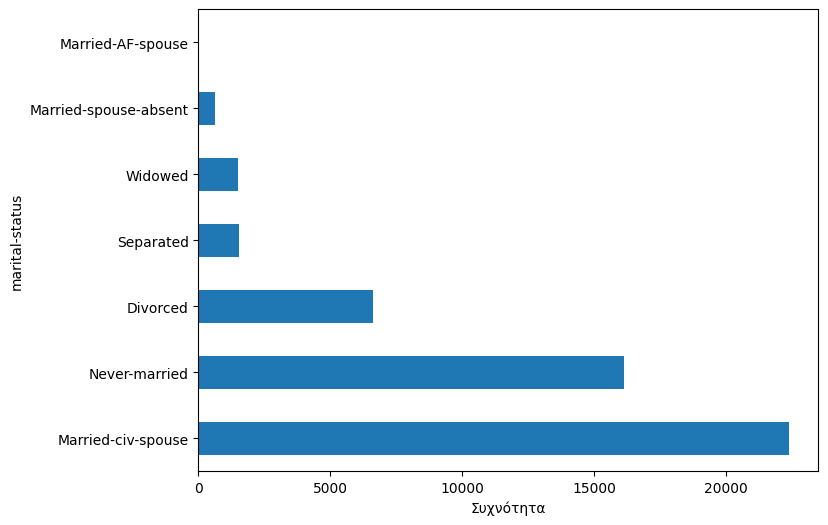

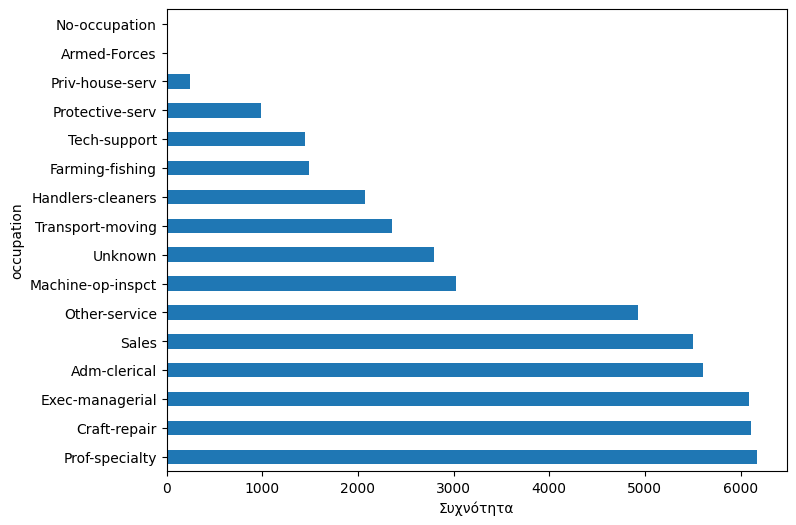

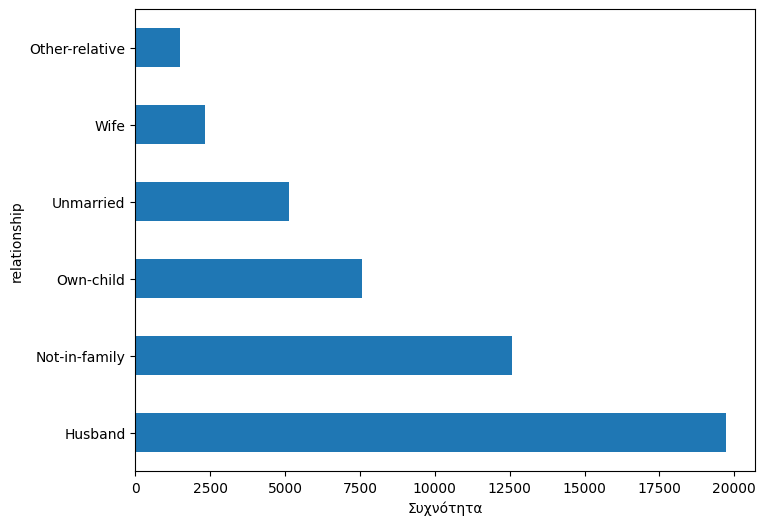

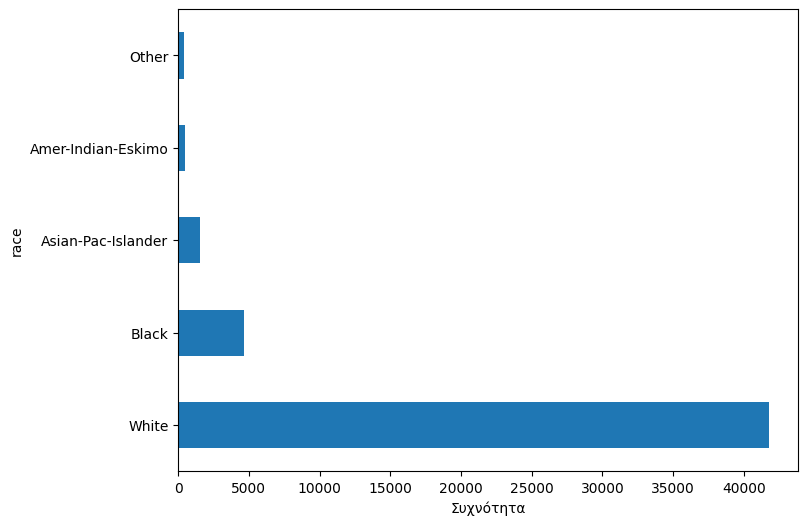

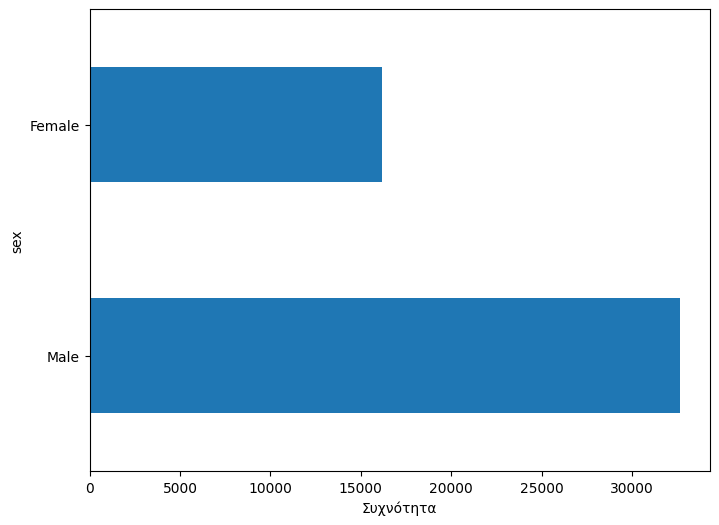

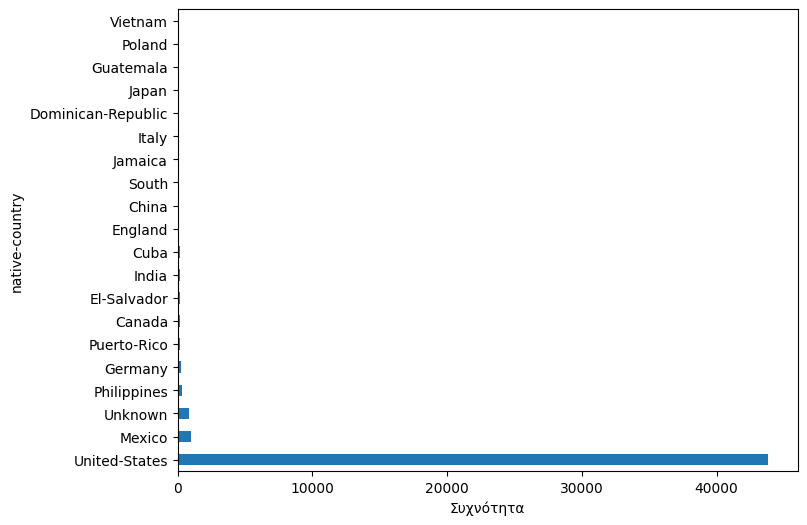

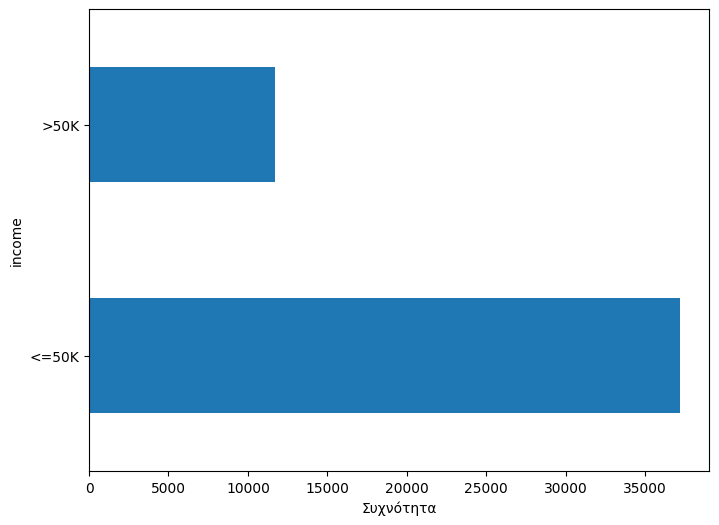

In [ ]:
# Ραβδογράμματα για τις 20 πιο συχνές τιμές των κατηγορικών χαρακτηριστικών
for col in adult.columns:
    if adult[col].dtype == 'object': # έλεγχος αν η στήλη είναι κατηγορική
      plt.figure(figsize=(8, 6))
      adult[col].value_counts().head(20).plot(kind='barh') # οπτικοποίηση των 20 πιο συχνών τιμών
      plt.xlabel("Συχνότητα")
      plt.ylabel(col)
      plt.show()

Ελαχιστοποίηση τιμών σε ορισμένα χαρακτηριστικά

1. Στήλη **education**

In [ ]:
adult["education"].value_counts() / len(adult) * 100

,count
education,
HS-grad,32.316449
Some-college,22.271815
Bachelors,16.430531
Masters,5.439990
Assoc-voc,4.219729
11th,3.709922
Assoc-acdm,3.277917
10th,2.843864
7th-8th,1.955284


In [ ]:
# Ενοποίηση των κατηγοριών στη στήλη education
education_mappings = {
    "Preschool": "No-Formal-Education",
    "1st-4th": "No-Formal-Education",
    "5th-6th": "No-Formal-Education",
    "7th-8th": "No-Formal-Education",
    "9th": "Some-High-School",
    "10th": "Some-High-School",
    "11th": "Some-High-School",
    "12th": "Some-High-School",
    "HS-grad": "High-School-Graduate",
    "Some-college": "Some-College",
    "Assoc-voc": "Some-College",
    "Assoc-acdm": "Some-College",
    "Bachelors": "Bachelors-Degree",
    "Masters": "Advanced-Degree",
    "Prof-school": "Advanced-Degree",
    "Doctorate": "Advanced-Degree"
}

adult["education"] = adult["education"].map(education_mappings)

In [ ]:
adult["education"].value_counts() / len(adult) * 100

,count
education,
High-School-Graduate,32.316449
Some-College,29.769461
Bachelors-Degree,16.430531
Some-High-School,9.446788
Advanced-Degree,8.363703
No-Formal-Education,3.673068


2. Στήλη **native-country**

In [ ]:
adult["native-country"].value_counts() / len(adult) * 100

,count
native-country,
United-States,89.742435
Mexico,1.947095
Unknown,1.754637
Philippines,0.603988
Germany,0.421768
Puerto-Rico,0.376725
Canada,0.372630
El-Salvador,0.317350
India,0.309160


In [ ]:
# Ομαδοποίηση των χωρών εκτός ΗΠΑ στην κατηγορία "Not-United-States"
for country in adult["native-country"].unique():
    if country != "United-States":
        adult.loc[adult["native-country"] == country, "native-country"] = "Not-United-States"

In [ ]:
adult["native-country"].value_counts() / len(adult) * 100

,count
native-country,
United-States,89.742435
Not-United-States,10.257565


3. Στήλη **workclass**

In [ ]:
adult["workclass"].value_counts() / len(adult) * 100

,count
workclass,
Private,69.419762
Self-emp-not-inc,7.907129
Local-gov,6.420703
Unknown,5.730724
State-gov,4.055935
Self-emp-inc,3.470374
Federal-gov,2.931903
Without-pay,0.042996
Never-worked,0.020474


In [ ]:
# Ενοποίηση των κατηγοριών στη στήλη workclass
for workclass in adult["workclass"].unique():
    if workclass == "Private":
        adult.loc[adult["workclass"] == workclass, "workclass"] = "Private-Sector"
    elif workclass == "Unknown":
        continue # επόμενη επανάληψη
    elif "gov" in workclass: # όσες κατηγορίες περιέχουν τη λέξη "gov" πρόκειται για τον δημόσιο τομέα
        adult.loc[adult["workclass"] == workclass, "workclass"] = "Public-Sector"
    elif "Self-emp" in workclass: # όσες κατηγορίες περιέχουν τη λέξη "Self-emp" πρόκειται για ελεύθερους επαγγελματίες
        adult.loc[adult["workclass"] == workclass, "workclass"] = "Self-Employed"
    else: # για τις κατηγορίες "Without-pay" και "Never-worked"
        adult.loc[adult["workclass"] == workclass, "workclass"] = "Unemployed"

In [ ]:
adult["workclass"].value_counts() / len(adult) * 100

,count
workclass,
Private-Sector,69.419762
Public-Sector,13.408542
Self-Employed,11.377503
Unknown,5.730724
Unemployed,0.063470


In [ ]:
# Κανονικοποίηση των αριθμητικών χαρακτηριστικών στο εύρος [0,1]
scaler = MinMaxScaler()
for col in adult.columns:
    if adult[col].dtype == 'int64':
        adult[col] = scaler.fit_transform(adult[[col]])

In [ ]:
adult.describe()

,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.120004,0.605206,0.010791,0.020088,0.402269
std,0.071445,0.171398,0.074521,0.092517,0.126443
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.071216,0.533333,0.000000,0.000000,0.397959
50%,0.112210,0.600000,0.000000,0.000000,0.397959
75%,0.152462,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


Επιβεβαιώνουμε πως όλα τα αριθμητικά χαρακτηριστικά είναι κανονικοποιήμενα στο εύρος [0, 1]

In [ ]:
# Κωδικοποίηση των κατηγορικών χαρακτηριστικών
le = LabelEncoder()
for col in adult.columns:
    if adult[col].dtype == 'object':
        adult[col] = le.fit_transform(adult[col])

In [ ]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,1,0.044131,1,0.800000,4,0,1,4,1,0.02174,0.0,0.397959,1,0
1,0,2,0.048052,1,0.800000,2,3,0,4,1,0.00000,0.0,0.122449,1,0
2,0,0,0.137581,2,0.533333,0,5,1,4,1,0.00000,0.0,0.397959,1,0
3,0,0,0.150486,5,0.400000,2,5,0,2,1,0.00000,0.0,0.397959,1,0
4,2,0,0.220635,1,0.800000,2,10,5,2,0,0.00000,0.0,0.397959,0,0


### γ) Μείωση όγκου δεδομένων

In [ ]:
X = adult.drop(columns=["income"]) # χαρακτηριστικά
y = adult["income"] # μεταβλητή στόχος

In [ ]:
# Μείωση διαστάσεων με PCA
pca = PCA(n_components=0.95) # διατήρηση του 95% της διακύμανσης
pct = pca.fit_transform(X)

In [ ]:
print("Αρχικός αριθμός χαρακτηριστικών:", X.shape[1])
print("Αριθμός χαρακτηριστικών μετά το PCA:", pct.shape[1])

Αρχικός αριθμός χαρακτηριστικών: 14
Αριθμός χαρακτηριστικών μετά το PCA: 6


In [ ]:
pct

array([[-6.84834390e+00, -4.33473441e-01, -1.99667795e+00,
         8.37299972e-01,  1.17139265e+00, -5.40851127e-01],
       [-3.81608968e+00, -2.21581694e+00, -9.49870509e-01,
         9.07393547e-02,  1.75326986e+00,  5.34775191e-02],
       [-2.02852813e+00, -2.17429603e+00,  6.71679121e-01,
        -1.70060307e+00, -4.75076919e-01,  5.46507465e-03],
       ...,
       [ 3.00535362e+00, -2.24289691e+00, -8.76320064e-01,
         2.42149977e-02, -7.31212859e-01, -4.14222183e-01],
       [-6.99582407e+00, -8.90852776e-01, -6.38986847e-01,
        -3.29742243e+00, -3.79603794e-02, -1.36428545e+00],
       [-3.81693079e+00, -2.22648859e+00, -9.51104498e-01,
         9.10014564e-02,  1.75084834e+00,  5.04615117e-02]])

In [ ]:
# Ενσωμάτωση των μειωμένων χαρακτηριστικών στο dataset
for i in range(pct.shape[1]):
    adult[f"pc{i+1}"] = pct[:, i]

1. Απλή τυχαία δειγματοληψία

In [ ]:
# Δειγματοληψία του 50% του συνόλου δεδομένων
sampled_data = adult.sample(frac=0.5)

print("Αρχικός αριθμός εγγραφών:", len(adult))
print("Αριθμός εγγραφών μετά τη τυχαία δειγματοληψία:", len(sampled_data))

Αρχικός αριθμός εγγραφών: 48842
Αριθμός εγγραφών μετά τη τυχαία δειγματοληψία: 24421


In [ ]:
# Προβολή της κατανομής του συνόλου δεδομένων πριν και μετά τη δειγματοληψία
print("Αρχική κατανομή του dataset:")
print(adult["income"].value_counts())

print("\nΚατανομή μετά τη τυχαία δειγματοληψία:")
print(sampled_data["income"].value_counts())

Αρχική κατανομή του dataset:
income
0    37155
1    11687
Name: count, dtype: int64

Κατανομή μετά τη τυχαία δειγματοληψία:
income
0    18572
1     5849
Name: count, dtype: int64


2. Διαστρωματωμένη δειγματοληψία

In [ ]:
samples = [] # κενή λίστα για αποθήκευση των δειγμάτων

# Εφαρμογή διαστρωματωμένης δειγματοληψίας για κάθε κατηγορία εισοδήματος
for income_category, category_data in adult.groupby("income"):
    sample_category = category_data.sample(frac=0.5)  # παίρνουμε το 50% των δεδομένων της κατηγορίας
    samples.append(sample_category)  # προσθήκη του δείγματος στη λίστα

# Ενοποίηση των δειγμάτων σε ένα νέο DataFrame
stratified_adult = pd.concat(samples).reset_index(drop=True)

In [ ]:
# Προβολή της κατανομής του συνόλου δεδομένων πριν και μετά τη δειγματοληψία
print("Αρχική κατανομή του dataset:")
print(adult['income'].value_counts())

print("\nΚατανομή μετά τη διαστρωματωμένη δειγματοληψία:")
print(stratified_adult['income'].value_counts())

Αρχική κατανομή του dataset:
income
0    37155
1    11687
Name: count, dtype: int64

Κατανομή μετά τη διαστρωματωμένη δειγματοληψία:
income
0    18578
1     5844
Name: count, dtype: int64


In [ ]:
adult.to_csv("adult-preproc.csv", index=False) # αποθήκευση του προεπεξεργασμένου dataset